<a href="https://colab.research.google.com/github/Wej28C/Introduction_Artificial_intelligence_CHPS704/blob/main/TP2/TP2.1-Qualit%C3%A9%20du%20vin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importer les bibliothèques Python**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

**Télécharger le Dataset**

In [2]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Premiers pas : identifier les données

### Quels sont les noms des colonnes ?

In [4]:
nom_colonnes = data.columns
print(nom_colonnes)
noms_colonnes_liste = list(data.columns)
print(noms_colonnes_liste)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


### Utiliser describe() et info() pour étudier le dataset
Question 1 : Il y a combien d'entrées (registres) ?
Question 2 : Est-ce qu'il y a des données manquantes ?

In [5]:
data.info()

# methode describe() pour obtenir des statistiques descriptives
statistiques = data.describe()
print(statistiques)

# Question 1 : Nombre d'entrées (registres)
nombre_entrees = data.shape[0]
print(f"Nombre d'entrées : {nombre_entrees}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000    

In [6]:
# Question 2 : Vérifier les données manquantes
donnees_manquantes = data.isnull().sum()
total_manquantes = donnees_manquantes.sum()

if total_manquantes > 0:
    print(f"Total des données manquantes : {total_manquantes}")
else:
    print("Il n'y a pas de données manquantes dans le dataset.")

Il n'y a pas de données manquantes dans le dataset.


Combien d'entrées existent pour chaque valeur de "quality" ?

In [7]:
compte_quality = data['quality'].value_counts()

# Afficher le nombre d'entrées pour chaque valeur de "quality"
print(compte_quality)

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


**Visualization des données**

**Analyse Bivariate**

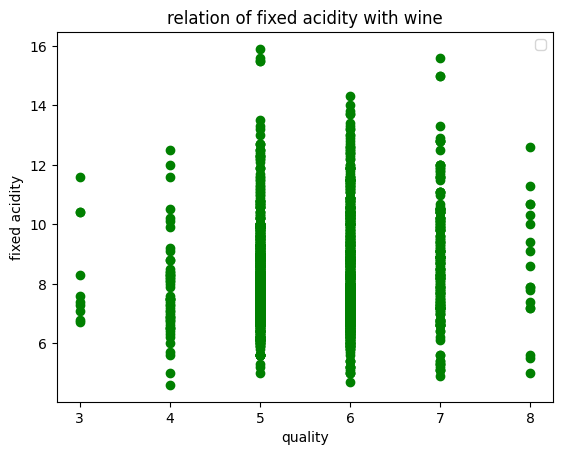

In [8]:
# Vérifier la variation de "fixed acidity" dans les différentes catégories de qualité du vin

plt.scatter(data['quality'], data['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

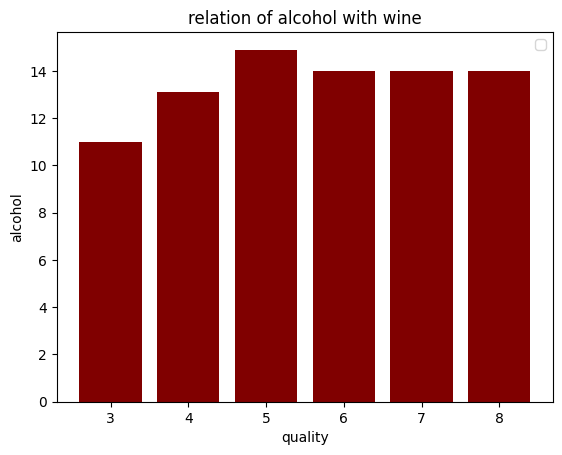

In [9]:
# Vérifier la variation de l'alcool dans les différentes catégories de qualité du vin

plt.bar(data['quality'], data['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

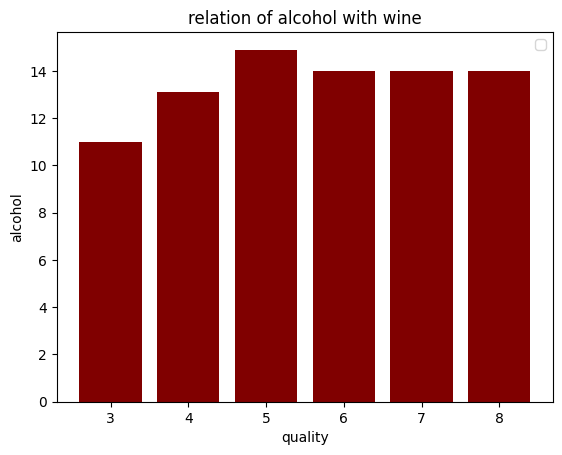

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599 

In [10]:
plt.bar(data['quality'], data['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()
print(data.groupby('quality').mean())


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


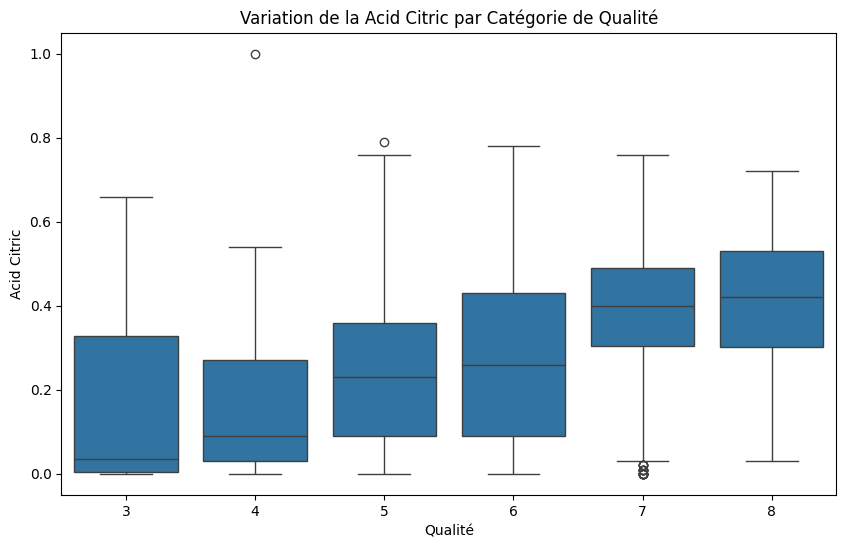

In [11]:
# Et pour l'acide citrique ?

fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'citric acid' , data = data)
plt.title('Variation de la Acid Citric par Catégorie de Qualité')
plt.xlabel('Qualité')
plt.ylabel('Acid Citric')
plt.show()


<Axes: xlabel='quality', ylabel='residual sugar'>

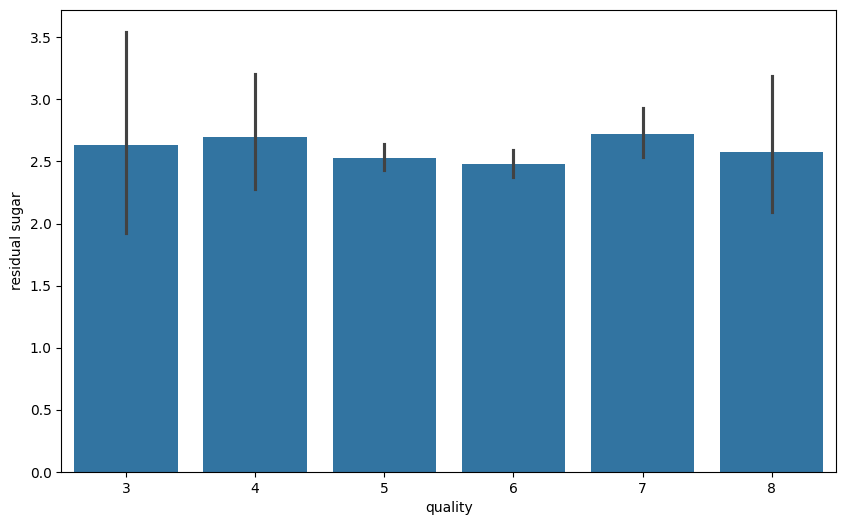

In [12]:
# Les variations du taux de sucre

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)


<Axes: xlabel='quality', ylabel='chlorides'>

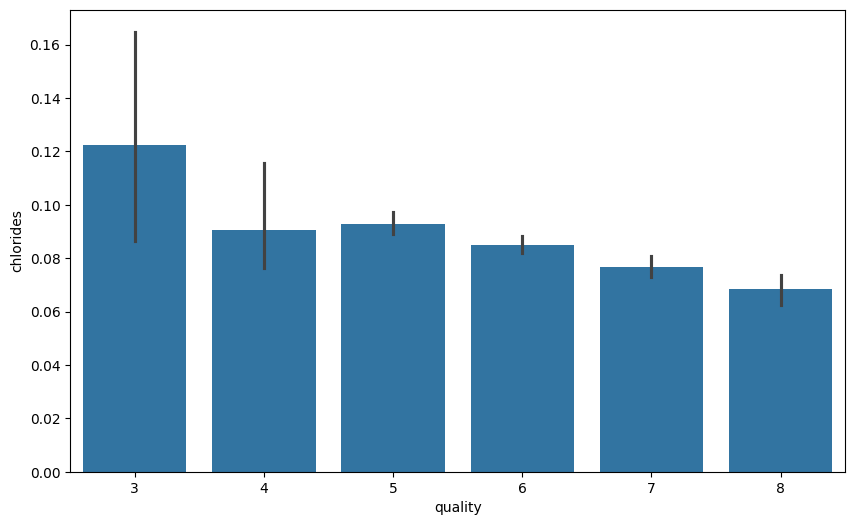

In [13]:
## Le "chloride"

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

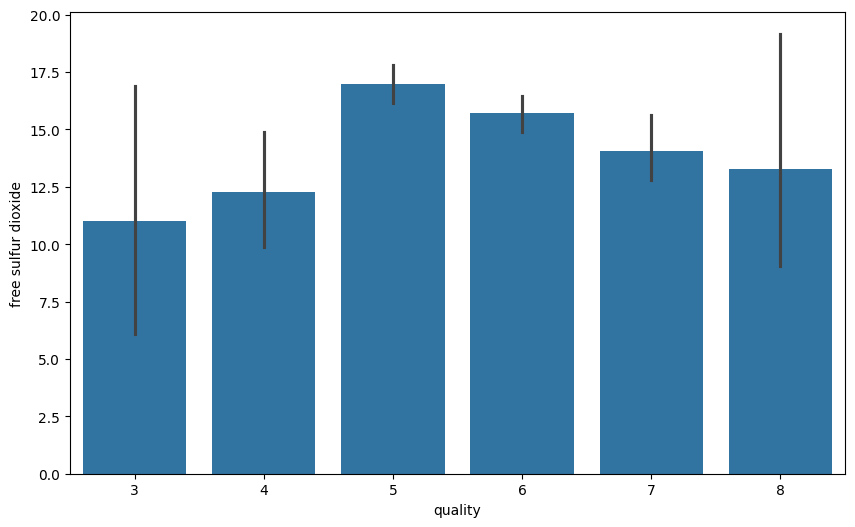

In [14]:
# Le dioxide de souffre (free sulfur dioxide)

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)



<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

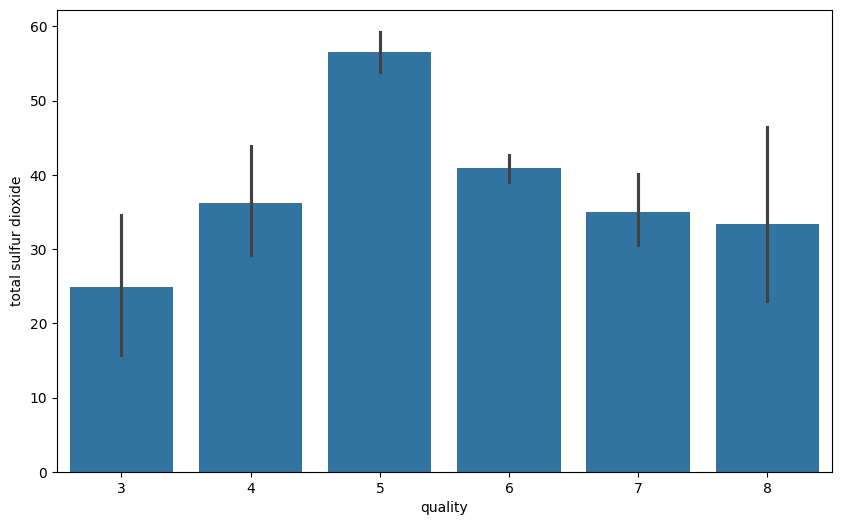

In [15]:
# total sulfur dioxide

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)

<Axes: xlabel='quality', ylabel='sulphates'>

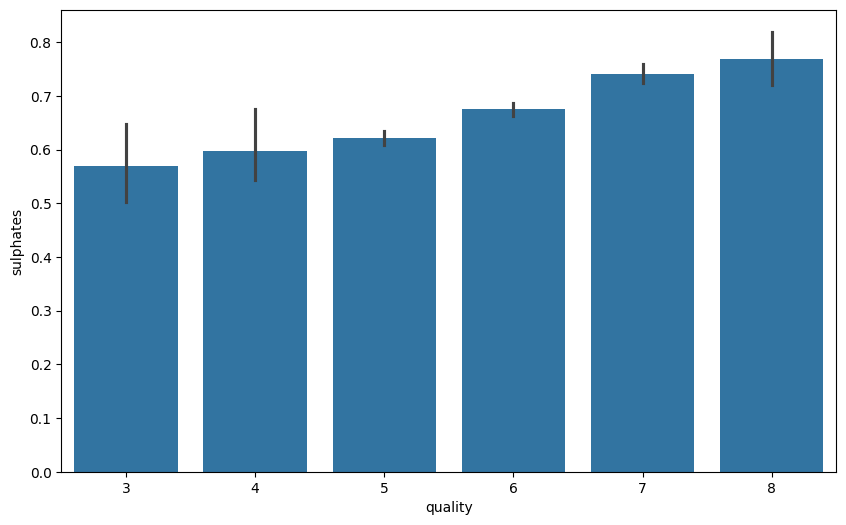

In [16]:
# et finalement, les sulphates

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

## Question: Est-ce qu'il y a des colonnes manquantes dans cette liste ? Essayez de les visualiser aussi.

Colonnes avec des données manquantes :
Series([], dtype: int64)


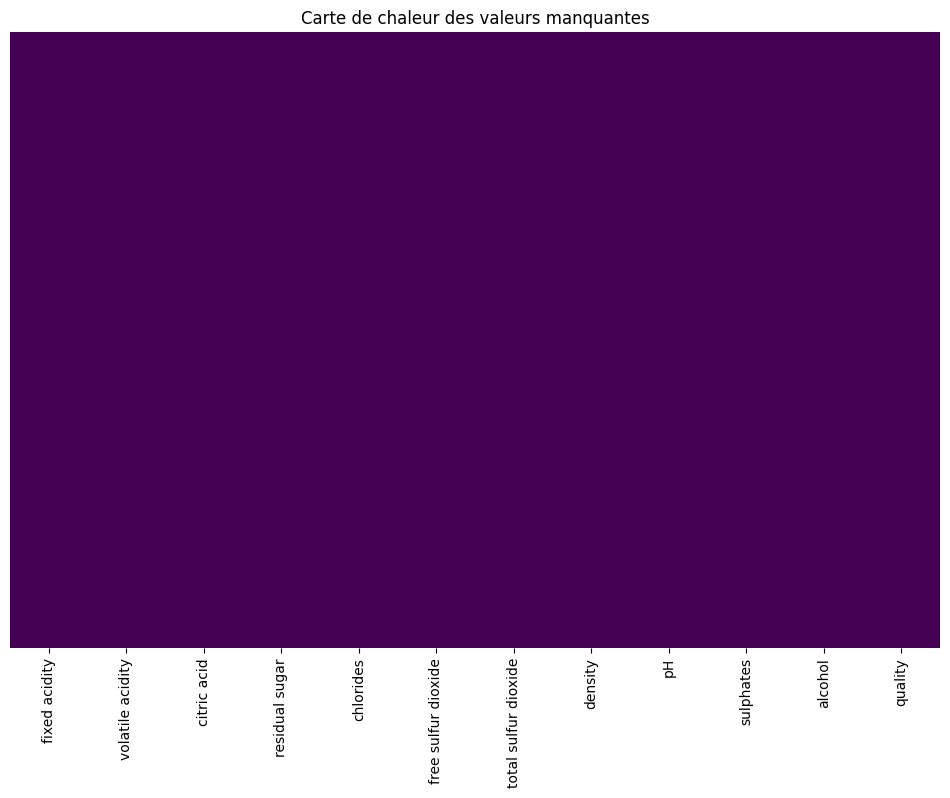

In [21]:
colonnes_manquantes = data.isnull().sum()
#les colonnes avec des données manquantes
colonnes_manquantes = colonnes_manquantes[colonnes_manquantes > 0]
print("Colonnes avec des données manquantes :")
print(colonnes_manquantes)
#avec seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Carte de chaleur des valeurs manquantes')
plt.show()

## Choix des variables

Comme nous pouvons le voir ci-dessus, certains éléments n'ont pas une forte relation avec la variable dépendante (qualité). Nous devons donc présenter un graphique de corrélation pour vérifier lesquels des éléments sont les plus liés à la variable dépendante et quels éléments sont les moins liés.

In [ ]:

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

À partir du graphique de corrélation ci-dessus pour l'ensemble de données donné pour la prédiction de la qualité du vin, nous pouvons facilement voir quels éléments sont fortement liés les uns aux autres et quels éléments sont liés chaque semaine les uns aux autres.
Par exemple,
# Les éléments très correlés sont :

1. _____
2. _____
3. _____
4. _____

Quel est l'élément le plus important pour la qualité du vin ?

______________________

# Les éléments peu corrélés sont :

1. _____
2. _____
3. _____

Certains n'ont aucune influence.

In [ ]:
sns.pairplot(data)

**Pré-traitement des données**

In [ ]:
#Suppression des colonnes inutiles de l'ensemble de données
# Comme nous l'avons vu, l'acidité fixe, le dioxyde de soufre libre, les le sucre et le pH sont très peu liés à la
# qualité, donc même si nous supprimons ces colonnes, la précision ne sera pas tellement affectée.

data = data.drop(['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'pH'], axis = 1)

# checking the shape of the dataset
#print(data.shape)

In [ ]:
data.columns

#Catégorisation des labels
La qualité des vins est donnée actuellement comme une note entre 0 et 10. Nous allons transformer cette note en 6 classes afin de classer les vins.

Plusieurs méthodes sont possibles. Dans le premier cas (code commenté), on utilise la fonction `cut()` de Pandas pour séparer les données en deux groupes (bad et good), selon des "points de coupe" indiqués (2 <= bad < 6.5 <= good <=8)

In [ ]:
# converting the response variables(3-7) as binary response variables that is either good or bad

#names = ['bad', 'good']
#bins = (2, 6.5, 8)

#data['quality'] = pd.cut(data['quality'], bins = bins, labels = names)


In [ ]:

data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})
data.info()

In [ ]:

data.head()
# Maintenant, combien de valeurs distinctes (classes) on trouve ?
data['quality'].value_counts()

## Encodage de données catégoriques
Maintenant que nous avons transformé les notes en catégories, il faut faire une dernière étape pour s'assurer que les labels seront bien pris en compte. Pour cela, on utilise le `LabelEncoder`vu en cours 1.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['quality'] = le.fit_transform(data['quality'])

data['quality'].value_counts

In [ ]:
sns.countplot(data, x="quality")

## Création des ensembles de train et test

In [ ]:
# Séparation des colonnes x ("features") de celle y ("target")

x = data.iloc[:,:7]
y = data.iloc[:,7]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

In [ ]:
# Séparation du dataset en train/test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Dernière étape, on utilise un scaler pour ramener toutes les variables dépendantes (x) à la même échelle de données (0 à 1 ou -1 à 1, le plus souvent). Ceci est important car on peut avoir des variables aveec des échelles très différentes (par exemple, "nombre de pièces d'une maison" en quelques unités et "prix" en miliers d'euros). Un scaler peut empechêr certains algorithmes d'être trompés par l'ordre de grandeur des valeurs.

In [ ]:
# standard scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


# Modélisation

Vous pouvez enfin créer un modèle machine learning pour vos données.

Le paragraphe ci-dessous utilise un arbre de décision. Rappellez-vous que la syntaxe ScikitLearn ne change que très peu, en général il suffit d'instancier un autre algorithme puis utiliser les mêmes appels fit et predict.

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# classification report
#classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


## Hyperparamètres

Avant de tester autres algorithmes, avez-vous noté qu'on n'a passé aucun paramètre à `DecisionTreeClassifier()` ? Regardez la documentation de cette classe dans [la doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) et essayez d'autres paramètres (profondeur max, par exemple).

## Autres algorithmes
Maintenant que vous avez fait un modèle avec les arbres de décision, créez des modèles avec d'autres algorithmes

**Random Forest**

`from sklearn.ensemble import RandomForestClassifier`

**Gradient Boost**
Ici nous allons utiliser une alternative à XGBoost.

`from sklearn.ensemble import GradientBoostingClassifier``

**K plus proches voisins (KNN)**

`from sklearn.neighbors import KNeighborsClassifier`

**Naive Bayes**

`from sklearn.naive_bayes import CategoricalNB`

**Logistic Regression**

`from sklearn.linear_model import LogisticRegression``


**SVM**

`from sklearn.svm import SVC`

La classe SVC a plusieurs hyperparamètres dont `kernel`. Essayez différents types de kernel parmi *linear*, *poly*, *rbf* (par défaut) ou *sigmoid*.


## Question 3: Quelle combinaison algorithme/hyperparamètres est la plus précise ?

# Bonus

Jusqu'à présent vous avez suivi des instructions. Essayez maintenant de faire tout seul :
- que se passe-t-il si on utilise toutes les colonnes (au lieu de supprimer les moins correlées) ?
- Est-ce qu'on peut améliorer l'accuracy en supprimant une colonne en plus ?
- Est-ce qu'on peut faire une meilleure classification avec un "category map" différent ?
- Comment votre modèle se comporte uniquement avec du vin blanc ? (http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv)
- Developez un modèle spécifique pour le vin blan et le comparez au modèle pour le vin rouge.